# 大学生薪资排行榜数据分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

In [17]:
df = pd.read_csv('salary.csv')
df.head(3)

,rank,university,category,province,985,211,2017,2015,2013
0,1,清华大学,理工,北京,1,1,9065,10969,12614
1,2,北京大学,综合,北京,1,1,9042,11212,13790
2,3,北京外国语大学,语言,北京,0,1,9020,10464,12242


## 学校类别占比

In [72]:
df['category'].value_counts().head(3)

理工    77
综合    43
财经    17
Name: category, dtype: int64

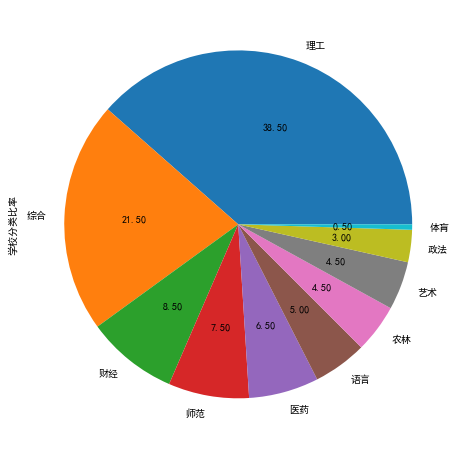

In [114]:
plt.figure(figsize=(8, 8))
df['category'].value_counts().plot.pie(label='学校分类比率', autopct='%.2f')

## 各省份高校数量

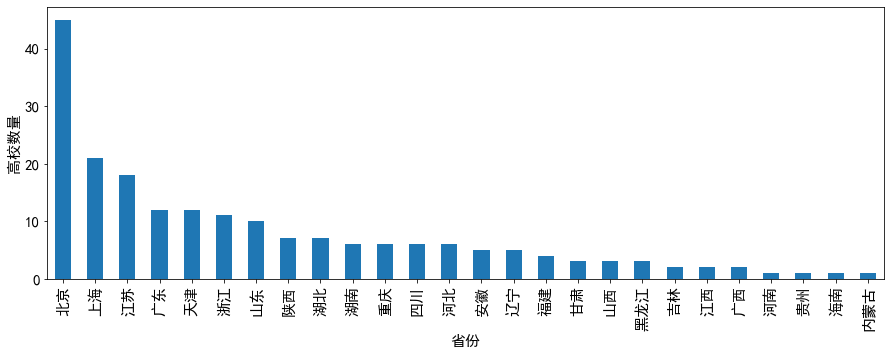

In [115]:
plt.figure(figsize=(15, 5))
plt.xlabel('省份', fontsize=15) # x轴名称
plt.ylabel('高校数量', fontsize=15) # y轴名称
df['province'].value_counts().plot(kind='bar', fontsize=15)

## 各省份985/211数量

In [73]:
df.groupby('province')[['985', '211']].sum().sort_values(ascending=False, by='211').head(3)

,985,211
province,,
北京,8,22
上海,4,9
江苏,2,7


Text(0, 0.5, '985/211高校数量')

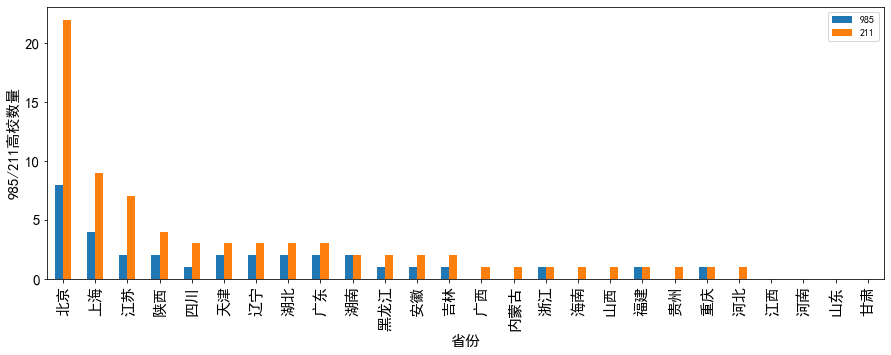

In [112]:
df.groupby('province')[['985', '211']].sum().sort_values(ascending=False, by='211').plot.bar(figsize=(15, 5), fontsize=15)
plt.xlabel('省份', fontsize=15) # x轴名称
plt.ylabel('985/211高校数量', fontsize=15) # y轴名称

## 江苏各高校薪资总和

In [77]:
js_df = df[df['province'] == '江苏']
js_df

,rank,university,category,province,985,211,2017,2015,2013
21,22,南京大学,综合,江苏,1,1,8462,10154,12693
32,33,东南大学,综合,江苏,1,1,8316,10228,11865
69,70,南京邮电大学,理工,江苏,0,0,7230,8966,10848
73,74,南京肮空航天大学,理工,江苏,0,1,7164,8239,9722
81,82,南京理工大学,理工,江苏,0,1,6679,7948,9537
99,100,南京艺术学院,艺术,江苏,0,0,6167,7278,8515
100,101,江苏大学,综合,江苏,0,0,6164,7643,8790
104,105,扬州大学,综合,江苏,0,0,6090,7369,8843
109,110,江南大学,综合,江苏,0,1,5818,6865,8307
130,131,中国药科大学,医药,江苏,0,1,5053,6063,7337


In [104]:
se_df = js_df.groupby('university')[['2017', '2015', '2013']].sum().sum(axis=1).sort_values(ascending=False)
se_df

university
南京大学        31309
东南大学        30409
南京邮电大学      27044
南京肮空航天大学    25125
南京理工大学      24164
江苏大学        22597
扬州大学        22302
南京艺术学院      21960
江南大学        20990
中国药科大学      18453
南京医科大学      17641
南京农业大学      17317
南京中医药大学     17039
南京林业大学      15409
常州大学        14969
南乐工业大学      13058
江苏科技大学      12593
南京信息工程大学    12580
dtype: int64

Text(0, 0.5, '薪资总和')

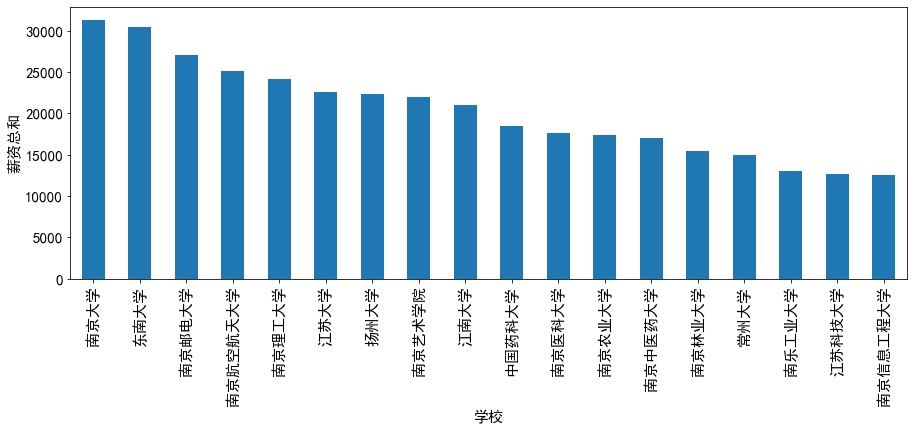

In [110]:
se_df.plot.bar(figsize=(15, 5), fontsize=15)
plt.xlabel('学校', fontsize=15) # x轴名称
plt.ylabel('薪资总和', fontsize=15) # y轴名称